In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# results

In [15]:
name_data = "mnist"
model = "fcn"
objective = "fclassic"

T = 6
if T == 2:
    split = "uniform"
else:
    split = "geometric"

gamma_t = 0.5
recursive_step_1 = False
risk_laststep = False
seeds = np.arange(5)

In [16]:
n_train = 60000
if split == "uniform":
    T_splits = [int(n_train / T)] * T
elif split == "geometric":
    if T == 2:
        T_splits = [30000, 30000]
    elif T == 4:
        T_splits = [7500, 7500, 15000, 30000]
    elif T == 6:
        T_splits = [1875, 1875, 3750, 7500, 15000, 30000]
    elif T == 8:
        T_splits = [468, 469, 938, 1875, 3750, 7500, 15000, 30000]

In [17]:
n_train_t_cumsum = np.cumsum(T_splits)
n_posteriors = [n_train - n_train_t_cumsum[t - 2] for t in range(1, T + 1)]
n_posteriors[0] = n_train

In [18]:
kl_seeds = []
excess_risk_seeds = []
risk_seeds = []
test_loss_seeds = []
for seed in seeds:

    exp_settings = f"{name_data}_{model}_{objective}_{split}_{T}_{recursive_step_1}_{risk_laststep}_{gamma_t}_{seed}.pt"

    results_dir = f"./results/rpb/results_" + exp_settings
    with open(results_dir, "rb") as handle:
        results = pickle.load(handle)

    kl_seeds.append(results["kl"])
    excess_risk_seeds.append(results["excess_risk"])
    risk_seeds.append(results["risk"])
    test_loss_seeds.append(results["test_loss"])

kl_seeds = np.array(kl_seeds)
excess_risk_seeds = np.array(excess_risk_seeds)
risk_seeds = np.array(risk_seeds)
test_loss_seeds = np.array(test_loss_seeds)

In [131]:
results["loss"]

[[0.8959166666666667,
  array([0.32233334, 0.24005   , 0.02108333], dtype=float32)],
 array([0.8539527 , 0.1467699 , 0.05190537], dtype=float32),
 array([0.92840886, 0.12277333, 0.04794667], dtype=float32),
 array([0.94664764, 0.11302857, 0.04356191], dtype=float32),
 array([0.94946665, 0.10493334, 0.03973333], dtype=float32),
 array([0.96113336, 0.1029    , 0.0384    ], dtype=float32)]

In [132]:
print((kl_seeds / n_posteriors).mean(0))
print((kl_seeds / n_posteriors).std(0))

[0.08434544 0.01978561 0.00583781 0.00334329 0.0026715  0.00224603]
[0.00225779 0.00061929 0.00024856 0.00013447 0.00027456 0.00016535]


In [133]:
print(excess_risk_seeds.mean(0))
print(excess_risk_seeds.std(0))

[0.0513542  0.13414577 0.10077886 0.09161786 0.08215704 0.0874544 ]
[0.00645198 0.0058879  0.00403601 0.00459338 0.00217122 0.00427696]


In [134]:
print(risk_seeds.mean(0))
print(risk_seeds.std(0))

[0.90500325 0.50385583 0.38607368 0.2938157  0.23852572 0.2014199
 0.18816435]
[0.00136571 0.00628223 0.00876474 0.00304643 0.00453856 0.0018695
 0.00511273]


In [135]:
print(test_loss_seeds.mean(0))
print(test_loss_seeds.std(0))

[0.22476 0.13612 0.11642 0.10732 0.10098 0.10054]
[0.01013619 0.00503563 0.00233701 0.00473937 0.00213579 0.00306764]


In [19]:
risk_seeds

array([[0.42318752, 0.40046839, 0.31951232, 0.25775431, 0.21793688,
        0.19469847],
       [0.43253838, 0.40418393, 0.32801394, 0.2592726 , 0.22161926,
        0.19725049],
       [0.41760157, 0.3952883 , 0.33161664, 0.25519441, 0.21963747,
        0.19528803],
       [0.42901931, 0.40466071, 0.33401431, 0.25980622, 0.216047  ,
        0.19433849],
       [0.43922953, 0.40444467, 0.32683888, 0.263031  , 0.22366003,
        0.20219751]])

# gamma

In [20]:
seed = 1
exp_settings = f"{name_data}_{model}_{objective}_{split}_{T}_{recursive_step_1}_{gamma_t}_{seed}.pt"

results_dir = f"./results/rpb/results_gamma_" + exp_settings
with open(results_dir, "rb") as handle:
    results_gamma = pickle.load(handle)

In [21]:
results_gamma[1][0.5]

KeyError: 1

In [29]:
gamma_ts = np.array([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [30]:
if not recursive_step_1:
    ts = np.arange(1, T + 1)[1:]
else:
    ts = np.arange(1, T + 1)

In [31]:
risks_0 = risk_seeds[seed, :]

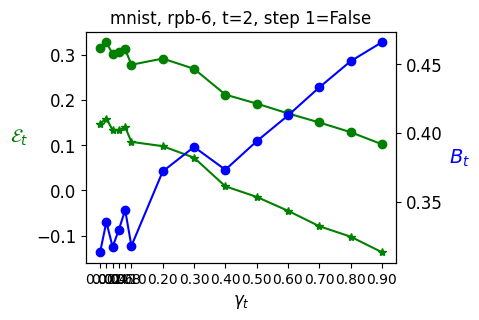

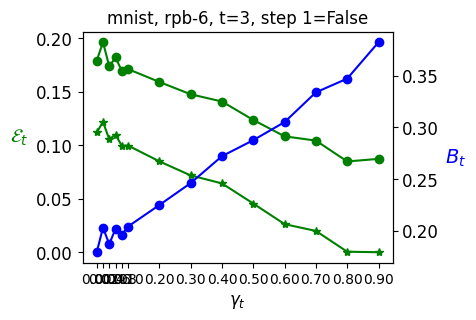

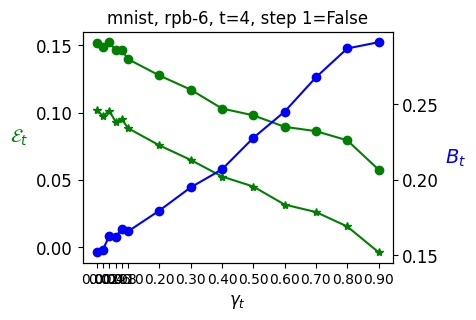

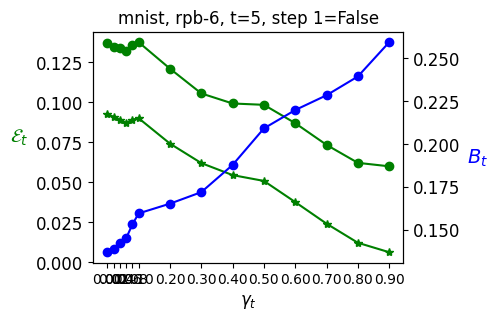

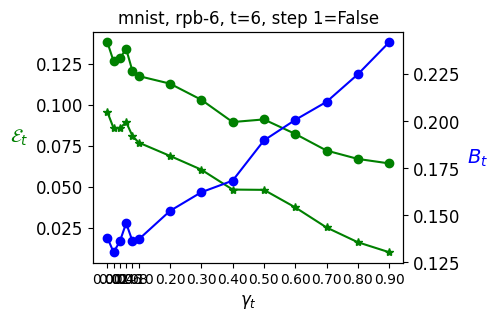

In [34]:
risk_gammas = {}
loss_excess_sum_gammas = {}
E_t_gammas = {}
for t in ts:
    risk_gammas[t] = []
    # risk_t_minus_1 = risks_0[t - 2]
    risk_t_minus_1 = risks_0[t - 1]
    loss_excess_sum_gammas[t] = []
    E_t_gammas[t] = []
    for gamma_t in gamma_ts:
        E_t_gamma_t = results_gamma[t][gamma_t]["E_t"]
        loss_excess_sum_gamma_t = results_gamma[t][gamma_t]["loss_excess_sum"]

        # print(gamma_t)
        # print(E_t_gamma_t)
        # print()

        risk_gammas[t].append(gamma_t * risk_t_minus_1 + E_t_gamma_t)
        loss_excess_sum_gammas[t].append(loss_excess_sum_gamma_t)
        E_t_gammas[t].append(E_t_gamma_t)

    # Sample data
    x = gamma_ts
    y11 = E_t_gammas[t]
    y12 = loss_excess_sum_gammas[t]
    y2 = risk_gammas[t]

    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(4, 3))

    # Plot the first set of data
    ax1.plot(x, y11, marker="o", color="g")  # 'g-' is a green solid line
    ax1.plot(x, y12, marker="*", color="g")  # 'g-' is a green solid line

    ax1.set_xlabel(r"$\gamma_t$", fontsize=12)
    ax1.set_xticks(x)
    ax1.set_ylabel(r"$\mathcal{E}_t$", color="g", fontsize=14, rotation=0, labelpad=12)
    ax1.tick_params(axis="y", labelsize=12)
    # ax1.yaxis.set_label_coords(1, 0.5)

    # Create a twin Axes sharing the x-axis
    ax2 = ax1.twinx()

    # Plot the second set of data
    ax2.plot(
        x,
        y2,
        marker="o",
        color="b",
    )  # 'b-' is a blue solid line
    ax2.set_ylabel(r"$B_t$", color="b", fontsize=14, rotation=0, labelpad=12)
    ax2.tick_params(axis="y", labelsize=12)

    # Show the plot
    plt.title(f"{name_data}, rpb-{T}, t={t}, step 1={recursive_step_1}")
    plt.savefig(
        f"gamma_{t}_{T}_{name_data}_{model}_{recursive_step_1}.png", bbox_inches="tight"
    )
    plt.show()

In [33]:
for t in [2]:
    print(f"t={t}, T={T}")
    for gamma in gamma_ts:
        print("gamma:", gamma, "binarification of excess loss:", results_gamma[t][gamma]["loss_excess_sum"],
              " excess loss:", results_gamma[t][gamma]["loss_posterior"]-gamma*results_gamma[t][gamma]["loss_prior"],
              )

t=2, T=6
gamma: 0.0 binarification of excess loss: 0.14768171310424805  excess loss: [0.14768172]
gamma: 0.02 binarification of excess loss: 0.1587874398380518  excess loss: [0.15878744]
gamma: 0.04 binarification of excess loss: 0.13320601716637612  excess loss: [0.13320602]
gamma: 0.06 binarification of excess loss: 0.13286882005631923  excess loss: [0.13286882]
gamma: 0.08 binarification of excess loss: 0.139647998213768  excess loss: [0.139648]
gamma: 0.1 binarification of excess loss: 0.1073049522936344  excess loss: [0.10730495]
gamma: 0.2 binarification of excess loss: 0.0977376304566861  excess loss: [0.09773763]
gamma: 0.3 binarification of excess loss: 0.07232516743242745  excess loss: [0.07232516]
gamma: 0.4 binarification of excess loss: 0.009118273854255676  excess loss: [0.00911828]
gamma: 0.5 binarification of excess loss: -0.014270983636379242  excess loss: [-0.01427097]
gamma: 0.6 binarification of excess loss: -0.04498580172657973  excess loss: [-0.04498581]
gamma: 0.

In [143]:
# gamma_ts = np.array([0.0, 0.02, 0.04, 0.06, 0.08, 0.1])

In [144]:
# risk_gammas = {}
# loss_excess_sum_gammas = {}
# E_t_gammas = {}
# for t in ts:
#     risk_gammas[t] = []
#     # risk_t_minus_1 = risks_0[t - 2]
#     risk_t_minus_1 = risks_0[t - 1]
#     loss_excess_sum_gammas[t] = []
#     E_t_gammas[t] = []
#     for gamma_t in gamma_ts:
#         E_t_gamma_t = results_gamma[t][gamma_t]["E_t"]
#         loss_excess_sum_gamma_t = results_gamma[t][gamma_t]["loss_excess_sum"]

#         # print(gamma_t)
#         # print(E_t_gamma_t)
#         # print()

#         risk_gammas[t].append(gamma_t * risk_t_minus_1 + E_t_gamma_t)
#         loss_excess_sum_gammas[t].append(loss_excess_sum_gamma_t)
#         E_t_gammas[t].append(E_t_gamma_t)

#     # Sample data
#     x = gamma_ts
#     y11 = E_t_gammas[t]
#     y12 = loss_excess_sum_gammas[t]
#     y2 = risk_gammas[t]

#     # Create a figure and a set of subplots
#     fig, ax1 = plt.subplots(figsize=(4, 3))

#     # Plot the first set of data
#     ax1.plot(x, y11, marker="o", color="g")  # 'g-' is a green solid line
#     ax1.plot(x, y12, marker="*", color="g")  # 'g-' is a green solid line

#     ax1.set_xlabel(r"$\gamma_t$", fontsize=12)
#     ax1.set_xticks(x)
#     ax1.set_ylabel(r"$\mathcal{E}_t$", color="g", fontsize=14, rotation=0, labelpad=12)
#     ax1.tick_params(axis="y", labelsize=12)
#     # ax1.yaxis.set_label_coords(1, 0.5)

#     # Create a twin Axes sharing the x-axis
#     ax2 = ax1.twinx()

#     # Plot the second set of data
#     ax2.plot(
#         x,
#         y2,
#         marker="o",
#         color="b",
#     )  # 'b-' is a blue solid line
#     ax2.set_ylabel(r"$B_t$", color="b", fontsize=14, rotation=0, labelpad=12)
#     ax2.tick_params(axis="y", labelsize=12)

#     # Show the plot
#     plt.title(f"{name_data}, rpb-{T}, t={t}, step 1={recursive_step_1}")
#     # plt.savefig(
#     #     f"gamma_{t}_{T}_{name_data}_{model}_{recursive_step_1}.png", bbox_inches="tight"
#     # )
#     plt.show()